<font size=4><b>Text Mining</b></font>

<font size=3>Project Documentation for Persian News Classification

Introduction

In this project, we aim to develop a text classification model for Persian news articles using a dataset containing various attributes of the news. The dataset consists of multiple columns, including:

Title: The headline of the news article.

Body: The main content of the news article.

Category: The classification label indicating the type or subject matter of the news (e.g., politics, sports, technology, etc.).

Time: The time the article was published.

Date: The date when the article was published.

The primary objective of this project is to create a reliable machine learning model that can automatically classify Persian news articles into predefined categories based on their content. By analyzing the relationships between the textual features of the articles (title and body) and their respective categories, the model will assist in the automatic organization and retrieval of news content, thereby improving user experience and engagement.
The project will involve data preprocessing steps such as text cleaning, tokenization, and feature extraction (e.g., TF-IDF, word embeddings) followed by training various classification algorithms. The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score to ensure its effectiveness in real-world applications.</font>

<font size="3">Importing Required Libraries

In this section, we import the necessary libraries for data handling, preprocessing, and building the deep learning model.</font>

In [34]:
import pandas  as pd
import numpy as np
import hazm
from hazm import Stemmer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
nltk.download('stopwords')
from hazm import WordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to C:\Users\T A
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size="3">Loading and Exploring the Dataset

We load the dataset and check its structure, including image dimensions and labels. This helps us understand what kind of data we are working with.</font>

In [2]:
data = pd.read_csv('per.csv')
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


<font size="3">Exploratory Data Analysis (EDA)

In this section, we check the basic structure of the dataset and look for missing values or abnormal data.</font>

In [3]:
data.isnull().sum()

NewsID       0
Title        0
Body         0
Date         0
Time         0
Category     0
Category2    0
dtype: int64

In [4]:
data.isna().sum()

NewsID       0
Title        0
Body         0
Date         0
Time         0
Category     0
Category2    0
dtype: int64

In [5]:
data[data['Category'] == ''].sum()

NewsID       0
Title        0
Body         0
Date         0
Time         0
Category     0
Category2    0
dtype: object

<font size="3">lead stopwords</font>

In [6]:
with open('stopwords.txt' , encoding='utf_8') as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [line.replace('/n' , '') for line in stopwords]
len(stopwords)

1316

In [7]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
print(nltk_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [8]:
len(nltk_stopwords)

198

In [9]:
stopwords.extend(nltk_stopwords)
print(stopwords)
len(stopwords)

['!\n', '"\n', '#\n', '(\n', ')\n', '*\n', ',\n', '-\n', '.\n', '/\n', ':\n', '[\n', ']\n', '«\n', '»\n', '،\n', '؛\n', '؟\n', 'آباد\n', 'آخ\n', 'آخر\n', 'آخرها\n', 'آخه\n', 'آدمهاست\n', 'آرام\n', 'آرام آرام\n', 'آره\n', 'آری\n', 'آزادانه\n', 'آسان\n', 'آسیب پذیرند\n', 'آشنایند\n', 'آشکارا\n', 'آقا\n', 'آقای\n', 'آقایان\n', 'آمد\n', 'آمدن\n', 'آمده\n', 'آمرانه\n', 'آن\n', 'آن گاه\n', 'آنان\n', 'آنانی\n', 'آنجا\n', 'آنرا\n', 'آنطور\n', 'آنقدر\n', 'آنها\n', 'آنهاست\n', 'آنچنان\n', 'آنچنان که\n', 'آنچه\n', 'آنکه\n', 'آنگاه\n', 'آن\u200cها\n', 'آهان\n', 'آهای\n', 'آور\n', 'آورد\n', 'آوردن\n', 'آورده\n', 'آوه\n', 'آی\n', 'آیا\n', 'آید\n', 'آیند\n', 'ا\n', 'اتفاقا\n', 'اثرِ\n', 'اجراست\n', 'احتراما\n', 'احتمالا\n', 'احیاناً\n', 'اخیر\n', 'اخیراً\n', 'اری\n', 'از\n', 'از آن پس\n', 'از جمله\n', 'ازاین رو\n', 'ازجمله\n', 'ازش\n', 'اساسا\n', 'اساساً\n', 'است\n', 'استفاد\n', 'استفاده\n', 'اسلامی اند\n', 'اش\n', 'اشتباها\n', 'اشکارا\n', 'اصلا\n', 'اصلاً\n', 'اصولا\n', 'اصولاً\n', 'اعلام\n', 'اغلب\

1514

<font size=3>This code snippet processes the news articles from a DataFrame data containing 
'Title' and 'Body' columns. It performs the following steps:

 1. Tokenization: Combines the title and body of each news article into a 
   single string and tokenizes it into individual words.
2. Stopword Removal: Filters out common Persian stopwords from the tokenized 
   words to reduce noise in the data.
3. Stemming: Applies stemming to the filtered words to reduce them to their 
   root forms, making it easier to analyze the text.
4. DataFrame Creation: Stores the processed text (combined and stemmed 
   words) along with the corresponding category into a new DataFrame named dataset.

The resulting dataset contains two columns: 'Title_Body', which includes the 
processed title and body text, and 'Category', which indicates the news article's 
category.</font>

In [10]:
tokenizer = WordTokenizer()
stemmer = Stemmer()
dataset = pd.DataFrame(columns=['Title_Body','Category'])
for index , row in data.iterrows():
    title_body = row['Title'] + ' ' + row['Body']
    title_body_tokenized = tokenizer.tokenize(title_body)
    title_body_tokenized_filter = [w for w in title_body_tokenized if w not in stopwords]
    title_body_tokenized_filter_stemmer = [stemmer.stem(w) for w in title_body_tokenized_filter]
    dataset.loc[index] = {'Title_Body' : ' '.join(title_body_tokenized_filter_stemmer) , 'Category' : row['Category2'].replace('\n' , '')}

In [11]:
dataset.head()

,Title_Body,Category
0,وزير علو درجمع استاد نمونه : سن بازنشستگي استا...,آموزشي
1,گردهمايي دانش‌آموختگ موسسه آموز عالي سوره برگز...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ا...,آموزشي
3,هماي يكروزه آسيب شناسي مفهو روابط عمومي در باب...,اجتماعي
4,وضعي اقتصادي و ميز تحصيل والدين از مهمترين عوا...,آموزشي


In [12]:
len(dataset)

10999

In [13]:
len(data)

10999

In [14]:
dataset.loc[0]

Title_Body    وزير علو درجمع استاد نمونه : سن بازنشستگي استا...
Category                                                 آموزشي
Name: 0, dtype: object

<font size="2">This code snippet applies TF-IDF (Term Frequency-Inverse Document Frequency) 
 vectorization to the processed text data in the 'Title_Body' column of the 
 dataset DataFrame. 

 The TF-IDF vectorizer transforms the text data into a sparse matrix of 
 TF-IDF features, where:
 - Term Frequency (TF) measures the frequency of a term in a document,
 - Inverse Document Frequency (IDF) dampens the effect of common terms 
   by giving more weight to less frequently occurring terms across 
   the entire dataset.

 The resulting sparse matrix X will be used as the feature set for 
 training machine learning models for the news article classification task.</font>

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['Title_Body'])

In [16]:
X

<10999x60857 sparse matrix of type '<class 'numpy.float64'>'
	with 2105900 stored elements in Compressed Sparse Row format>

In [17]:
X.data

array([0.02475792, 0.02868001, 0.03740069, ..., 0.03745591, 0.02970997,
       0.08866777])

<font size=3>lable encoder target column</font>


In [18]:
le = LabelEncoder()
y = le.fit_transform(dataset['Category'])

In [19]:
y

array([ 0,  0,  0, ..., 10, 10, 10])

In [20]:
len(y)

10999

In [21]:
print(np.unique(dataset['Category']))

['آموزشي' 'اجتماعي' 'اقتصادي' 'بهداشتي' 'تاريخي' 'سياسي' 'علمي' 'فرهنگي'
 'فقه و حقوق' 'مذهبي' 'ورزشي']


In [22]:
np.unique(dataset['Category'])

array(['آموزشي', 'اجتماعي', 'اقتصادي', 'بهداشتي', 'تاريخي', 'سياسي',
       'علمي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [23]:
len(dataset.groupby('Category'))

11

In [24]:
dataset.groupby('Category').size()

Category
آموزشي        1000
اجتماعي       1000
اقتصادي       1000
بهداشتي       1000
تاريخي         999
سياسي         1000
علمي          1000
فرهنگي        1000
فقه و حقوق    1000
مذهبي         1000
ورزشي         1000
dtype: int64

<font size="3">Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>

In [25]:
x_train , x_test , y_train , y_test = train_test_split(X,y , random_state=42)

<font size="3">1) svc algorithm to classify news</font>

In [26]:
svc_text = SVC(kernel='linear')
svc_text.fit(x_train , y_train)
y_pred = svc_text.predict(x_test)

In [27]:
# svc model score
svc_text.score(x_test , y_test)

0.8476363636363636

In [28]:
# classification_report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       235
           1       0.66      0.62      0.64       250
           2       0.78      0.81      0.80       253
           3       0.86      0.92      0.89       263
           4       0.93      0.89      0.91       263
           5       0.81      0.73      0.77       245
           6       0.82      0.77      0.80       249
           7       0.87      0.88      0.87       238
           8       0.86      0.89      0.87       255
           9       0.95      0.94      0.95       252
          10       0.96      0.96      0.96       247

    accuracy                           0.85      2750
   macro avg       0.85      0.85      0.85      2750
weighted avg       0.85      0.85      0.85      2750



In [29]:
#confusion_matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[212   7   1   3   0   2   8   2   0   0   0]
 [ 18 154  19   9   6   7   8  11  13   2   3]
 [  0  22 206   5   0   5   7   4   2   2   0]
 [  0   7   3 242   0   0   8   2   0   0   1]
 [  2   8   2   0 235  11   0   2   3   0   0]
 [  5  14  16   3   6 180   4   1  15   1   0]
 [ 17   6   8  15   1   2 192   5   1   0   2]
 [  3   3   1   0   3   4   3 210   2   6   3]
 [  3   6   4   2   2   6   2   2 227   1   0]
 [  0   6   2   0   1   2   0   3   1 237   0]
 [  0   2   2   3   0   2   1   0   1   0 236]]


<font size="3">2)catboost algorithm to classify news</font>

In [30]:
catboos = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    task_type='GPU',
    random_seed=42
)
catboos.fit(x_train, y_train)
y_pred = catboos.predict(x_test)

0:	learn: 2.2753975	total: 542ms	remaining: 2m 41s
1:	learn: 2.1874695	total: 1s	remaining: 2m 29s
2:	learn: 2.1199866	total: 1.5s	remaining: 2m 28s
3:	learn: 2.0599751	total: 1.97s	remaining: 2m 26s
4:	learn: 2.0062074	total: 2.46s	remaining: 2m 24s
5:	learn: 1.9610270	total: 2.94s	remaining: 2m 24s
6:	learn: 1.9222922	total: 3.43s	remaining: 2m 23s
7:	learn: 1.8871908	total: 3.92s	remaining: 2m 23s
8:	learn: 1.8549535	total: 4.37s	remaining: 2m 21s
9:	learn: 1.8228481	total: 4.88s	remaining: 2m 21s
10:	learn: 1.7922011	total: 5.34s	remaining: 2m 20s
11:	learn: 1.7639508	total: 5.82s	remaining: 2m 19s
12:	learn: 1.7389557	total: 6.29s	remaining: 2m 18s
13:	learn: 1.7160218	total: 6.78s	remaining: 2m 18s
14:	learn: 1.6929765	total: 7.23s	remaining: 2m 17s
15:	learn: 1.6718258	total: 7.65s	remaining: 2m 15s
16:	learn: 1.6537677	total: 8.04s	remaining: 2m 13s
17:	learn: 1.6338355	total: 8.53s	remaining: 2m 13s
18:	learn: 1.6157524	total: 8.99s	remaining: 2m 12s
19:	learn: 1.5993344	total

In [31]:
# classification_report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       235
           1       0.51      0.48      0.50       250
           2       0.73      0.75      0.74       253
           3       0.83      0.88      0.85       263
           4       0.88      0.82      0.85       263
           5       0.69      0.70      0.69       245
           6       0.73      0.72      0.73       249
           7       0.80      0.74      0.77       238
           8       0.85      0.85      0.85       255
           9       0.89      0.88      0.89       252
          10       0.94      0.94      0.94       247

    accuracy                           0.79      2750
   macro avg       0.79      0.79      0.79      2750
weighted avg       0.79      0.79      0.79      2750



In [32]:
#confusion_matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[209   5   0   4   1   0  14   1   0   1   0]
 [ 17 121  30  13   5  13  13  17  10   7   4]
 [  2  22 191   8   0   8   8   4   4   6   0]
 [  2  14   1 231   0   2   8   1   1   0   3]
 [  2   6   2   0 215  23   3   7   3   2   0]
 [  6  15  10   4  13 171   6   2  15   0   3]
 [ 15  18  14  13   1   1 180   3   1   0   3]
 [  3  18   7   1   4  10  12 176   1   4   2]
 [  0   7   3   2   2  15   2   2 218   4   0]
 [  1   8   3   1   4   2   1   6   3 222   1]
 [  0   3   2   2   0   3   0   0   1   3 233]]


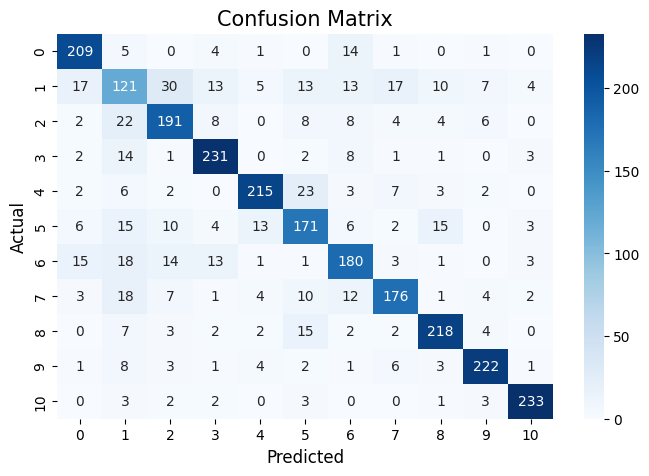

In [35]:
cm = metrics.confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<font size="3">3)RandomForestClassifier algorithm to classify news</font>

In [36]:
rfc = RandomForestClassifier(n_estimators=300 , max_depth=10 , n_jobs=-1)
rfc.fit(x_train , y_train)
y_pred = rfc.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       235
           1       0.59      0.20      0.30       250
           2       0.66      0.78      0.72       253
           3       0.77      0.96      0.85       263
           4       0.75      0.85      0.79       263
           5       0.76      0.53      0.63       245
           6       0.80      0.58      0.67       249
           7       0.82      0.76      0.79       238
           8       0.77      0.84      0.80       255
           9       0.85      0.92      0.88       252
          10       0.91      0.96      0.94       247

    accuracy                           0.76      2750
   macro avg       0.76      0.76      0.74      2750
weighted avg       0.76      0.76      0.74      2750



In [37]:
# confusion_matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[229   0   0   2   2   0   1   0   0   0   1]
 [ 36  51  49  17  12  11  12  15  30   9   8]
 [  6   4 198  11   4   5   5   7   4   9   0]
 [  4   2   1 252   0   0   1   1   1   0   1]
 [  3   8   2   1 223  12   3   7   1   3   0]
 [ 16   9  23   4  29 131   6   1  21   2   3]
 [ 36   5  15  30   3   1 144   2   6   1   6]
 [ 10   4   4   2   9   4   7 182   1  10   5]
 [  7   3   3   6   6   7   1   2 213   7   0]
 [  0   0   3   0   9   2   0   5   0 233   0]
 [  1   1   0   2   2   0   0   1   1   1 238]]


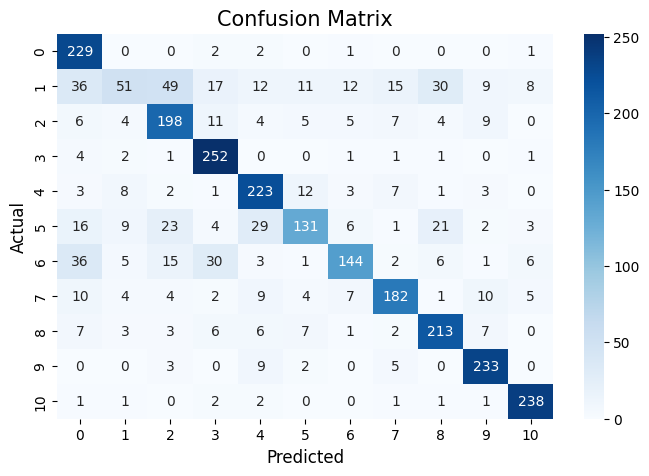

In [38]:
cm = metrics.confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<font size="3">4) kneighbors algorithm to classify news</font>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       248
           1       0.52      0.46      0.49       252
           2       0.66      0.74      0.70       258
           3       0.79      0.83      0.81       265
           4       0.58      0.96      0.73       242
           5       0.78      0.51      0.62       249
           6       0.77      0.52      0.62       242
           7       0.86      0.71      0.78       233
           8       0.84      0.77      0.81       249
           9       0.93      0.87      0.90       262
          10       0.95      0.92      0.93       250

    accuracy                           0.75      2750
   macro avg       0.76      0.75      0.74      2750
weighted avg       0.76      0.75      0.74      2750



In [ ]:
# confusion_matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[227   3   1   1   2   0  12   0   1   1   0]
 [ 24 116  27   9  24   7  11   8  13   7   6]
 [  7  29 190  10   6   5   3   0   3   4   1]
 [  6  11  14 221   5   1   2   1   2   0   2]
 [  1   1   0   2 233   2   0   2   1   0   0]
 [ 10  12  15   3  57 127   3   6  12   3   1]
 [ 29  16  20  28  13   2 127   6   0   0   1]
 [  9  12   4   2  26   4   4 165   4   2   1]
 [  5  13   6   3  18   7   2   1 192   1   1]
 [  1   7   9   0  12   4   0   2   0 227   0]
 [  3   3   2   2   4   4   2   0   0   0 230]]


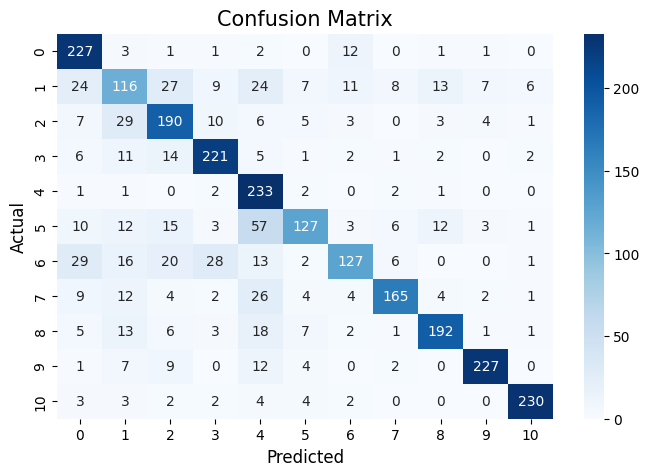

In [ ]:
cm = metrics.confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [39]:
with open('stemmer.pkl' , 'wb') as f:
    pickle.dump(stemmer, f)
with open('vectorizer.pkl' , 'wb') as f:
    pickle.dump(vectorizer, f)
with open('lable_encoder.pkl' , 'wb') as f:
    pickle.dump(le, f)
with open('FarsiTextClassifier.pkl' , 'wb') as f:
    pickle.dump(svc_text, f)